## Download the data:

In [ ]:
!kaggle competitions download -c digit-recognizer

In [ ]:
!mkdir data
!unzip digit-recognizer.zip -d data

## Setup

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from datetime import datetime
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Since the dataset has a large number of features, it's best to let Pandas display all the columns of the dataframe
pd.options.display.max_columns = None
# Turn off Future Warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



import timeit


In [96]:
# Read the training data
train_df = pd.read_csv("data/train.csv")
# Read the test data
test_df = pd.read_csv("data/test.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [97]:
## Display a sample of training dataset

y_train = train_df['label'].astype('int32')
X_train = (train_df.drop(['label'], axis = 1)).values.astype('float32')
X_test = test_df.values.astype('float32')

batch_size, img_rows, img_cols = 64, 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

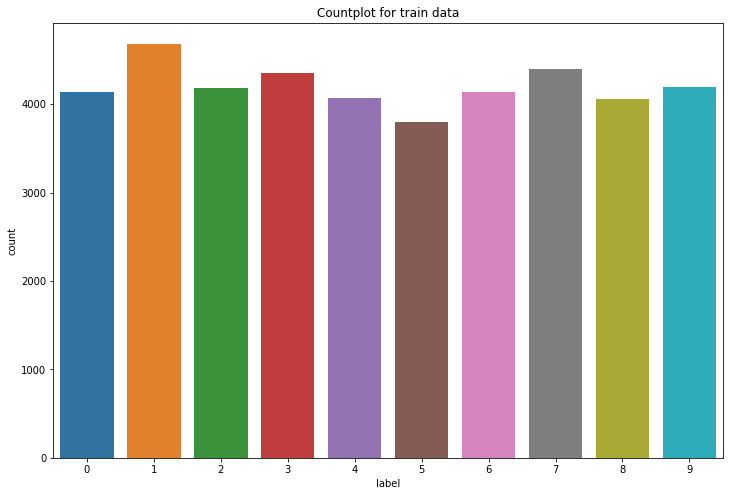

In [100]:
# ploting countplot for train data
plt.figure(figsize=(12,8))
plt.title('Countplot for train data')
sns.countplot(y_train);

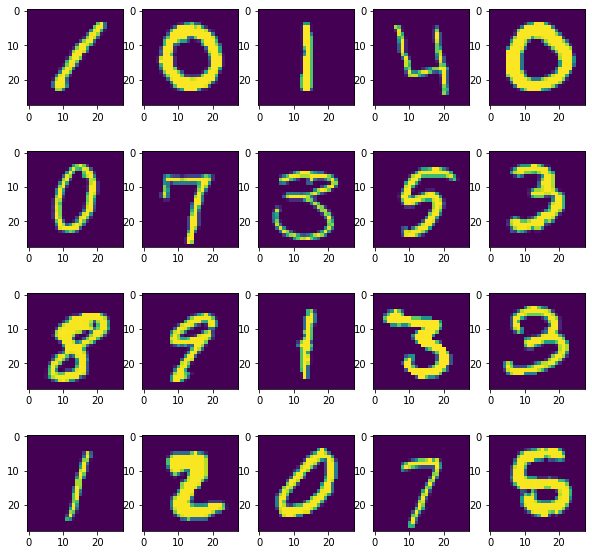

In [101]:
# images 
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i].reshape((28, 28)))
plt.show()

## Split Target Variable

##### Separate dependent and independent variables

In [102]:
X = train_df.iloc[:,1:]
y = train_df['label']

##### Standardize the values

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
test_df = scaler.fit_transform(test_df)

##### Split X in training and testing subsets

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

## 1. Random Forest Classifier

In [105]:
rfc = RandomForestClassifier(n_jobs=8, 
                                 max_features = 'sqrt',
                                 bootstrap = True,
                                 n_estimators = 10)

In [106]:
start_time = datetime.now() 

rfc.fit(X, y)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:00.614992


In [107]:
rfc.score(X_test,y_test)

0.9988095238095238

## 2. PCA on combined datasets

In [108]:
test_df = pd.read_csv("data/test.csv")

In [109]:
# Combine train and test dataframes
df_combined = pd.concat(objs=[train_df.iloc[:,1:], test_df], axis=0).reset_index(drop=True)

In [110]:
# Defiing our PCA with the 95% variability
pca = PCA(n_components=0.95)

In [111]:
start_time = datetime.now() 

pca.fit(df_combined)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:02.856862


In [17]:
len(pca.components_)

154

So it looks like we have about half of the number of the features

## 3. Random Forest on PCA Components

In [18]:
rfc_pca = RandomForestClassifier(n_jobs=8, 
                                 max_features = 'sqrt',
                                 bootstrap = True,
                                 n_estimators = 10)

In [19]:
# Transforming the training set with PCA
train_pca = pca.transform(train_df.iloc[:,1:])

In [20]:
start_time = datetime.now() 

rfc_pca.fit(train_pca, y)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:01.204921


In [21]:
test_pca = pca.transform(test_df)
prediction_pca = rfc_pca.predict(test_pca)
pred2 = pd.Series(prediction_pca, name='Label')
submission2 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred2],axis = 1)
submission2.to_csv("data/digit_recog2.csv",index=False)

## 4. PCA Fix - 1

In [22]:
# Read the training data
train_df = pd.read_csv("data/train.csv")
# Read the test data
test_df = pd.read_csv("data/test.csv")

In [23]:
pca_new = PCA(n_components=0.95)
start_time = datetime.now() 

pca_new.fit(train_df.iloc[:,1:])

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:01.542913


In [24]:
rfc_pca1 = RandomForestClassifier(n_jobs=8, 
                                 max_features = 'sqrt',
                                 bootstrap = True,
                                 n_estimators = 10)
train_pca1 = pca_new.transform(train_df.iloc[:,1:])

start_time = datetime.now() 

rfc_pca1.fit(train_pca1, train_df['label'])

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:01.121315


In [32]:
rfc_pca1.score(X_test, y_test)

0.9991666666666666

In [55]:
test_pca1 = pca_new.transform(test_df)
prediction_pca2 = rfc_pca1.predict(test_pca1)
pred3 = pd.Series(prediction_pca2, name='Label')
submission3 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred3],axis = 1)
submission3.to_csv("data/digit_recog3.csv",index=False)

## 4. PCA Fix - 2

In [26]:
X = pca_new.transform(train_df.iloc[:,1:])
y = train_df['label']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [28]:
rfc_pca2 = RandomForestClassifier(n_jobs=8, 
                                 max_features = 'sqrt',
                                 bootstrap = True,
                                 n_estimators = 10)
start_time = datetime.now() 

rfc_pca2.fit(X_train, y_train)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:00.887211


## 5. Kmeans Clustering

In [35]:
n_digits = len(np.unique(y))

In [41]:
pca = PCA(n_components=n_digits)
X_pca = pca.fit(X).transform(X)

In [43]:
from sklearn.cluster import KMeans 
start_time = datetime.now() 
kmeans = KMeans(n_clusters=n_digits, init=pca.components_, n_init=1)
predict = kmeans.fit(X).predict(X)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:07.820073


In [50]:
prediction_kmeans = kmeans.predict(test_df)
pred_kmeans = pd.Series(prediction_kmeans, name='Label')
submission_kmeans = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred_kmeans],axis = 1)
submission_kmeans.to_csv("data/digit_recog4.csv",index=False)

In [54]:
kmeans.score(X)

-107201760340.00273

### CNN and Keras
Here I would like to try to test CNN on MNIST dataset and see how that performs compared to Kmeans and Random Forest models. 

In [75]:
train = pd.read_csv('data/train.csv')
y=train['label']
# Normalize the data
X=train.drop('label',axis=1).values/255.0
# Reshape the data into 3 dimensions. 
X=X.reshape(-1,28,28,1)

In [77]:
# Split the test and train datasets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from keras.models import *
from keras.layers import *
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [79]:
# Defining the model
model=Sequential()
# Add layers
model.add(Conv2D(128, (3, 3), input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Activation("relu")) # Using the relu activation function. 
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# For the final layer, I am using the softmax activation function to give us multiclass classification. 
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [80]:
# Chekcing out the model summary. 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 512)       590336    
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 512)       2048      
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 512)      

In [81]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=0,
    mode='auto',
    restore_best_weights=True
)

In [82]:
start_time = datetime.now() 

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping_monitor])


time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Train on 26880 samples, validate on 6720 samples
Epoch 1/100
26880/26880 [==============================] - 24s 910us/step - loss: 0.1453 - accuracy: 0.9560 - val_loss: 0.0918 - val_accuracy: 0.9716
Epoch 2/100
26880/26880 [==============================] - 22s 806us/step - loss: 0.0664 - accuracy: 0.9786 - val_loss: 0.0521 - val_accuracy: 0.9842
Epoch 3/100
26880/26880 [==============================] - 22s 812us/step - loss: 0.0526 - accuracy: 0.9826 - val_loss: 0.0634 - val_accuracy: 0.9814
Epoch 4/100
26880/26880 [==============================] - 22s 818us/step - loss: 0.0455 - accuracy: 0.9851 - val_loss: 0.0501 - val_accuracy: 0.9841
Epoch 5/100
26880/26880 [==============================] - 22s 809us/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0970 - val_accuracy: 0.9763
Epoch 6/100
26880/26880 [==============================] - 22s 814us/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0447 - val_accuracy: 0.9884
Epoch 7/100
26880/26880 [==========================

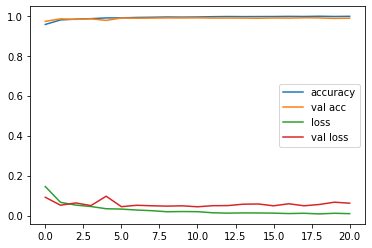

In [83]:
# Let's plot the model training and validation accuracy and validate the early stopping decision. 
import matplotlib.pyplot as plt
res=history.history

plt.plot(res['accuracy'],label="accuracy")
plt.plot(res['val_accuracy'],label="val acc")
plt.plot(res['loss'],label='loss')
plt.plot(res['val_loss'],label='val loss')
plt.legend()
plt.show()

We could see that both training nad validation scores evenout near the 20th epoch, that's why the it stopped training.

In [84]:
# Validating our model. 
model.evaluate(X_test, y_test)

8400/8400 [==============================] - 2s 195us/step


[0.030636913360595784, 0.9916666746139526]

In [87]:
# Reshaping the test df for the model
test = pd.read_csv('data/test.csv')
test = test.values/255.0
test = test.reshape(-1, 28, 28, 1)

In [88]:
prediction_cnn = model.predict(test)

In [90]:
new_pred=[]
for i in prediction_cnn:
    new_pred.append(i.argmax())

In [93]:
submit=pd.read_csv('data/sample_submission.csv')
submit['Label']=new_pred
submit.to_csv('data/digit_recog_cnn_1.csv',index=False)